In [1]:
import os
import numpy as np
import scipy.linalg as slin
import scipy.optimize as sopt
from scipy.special import expit as sigmoid
import matplotlib.pyplot as plt

### Running notears
Very simple! Clone the repo, interestingly enough, copy "linear.py" up one directory, and run the command below

In [2]:
# fill this in. This should point to the root of the github repo, i.e., 
# where the directories "bin", "experiments", "notears", etc. are
path = "C:/Users/s165048/OneDrive - TU Eindhoven/QuinceyFinalProject/final-project/src/Week 12/notears/notears"

### Run the main example
For some reason, imports do not work from the original directory, so I had to copy ``linear.py`` and put it also one directory up. Not ideal to have two copies, but I never intend to run it again using ``!python ...`` anyways.

In [3]:
# set working directory to the correct place
os.chdir(path)

# run main of linear.py. Does not allow for changing of settings
!python ../linear.py

VAR based on a graph on 5 nodes and 5 edges, 50 samples.
Original Adjacency Matrix:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]].

Original WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.5 -1.9]
 [-1.9  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.1]
 [ 0.   0.  -0.9  0.   0. ]].

2.383189645627226e-09 10000000000.0
Estimated WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.  -1.5]
 [-1.9  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1. ]
 [ 0.   0.  -1.   0.   0. ]].

{'fdr': 0.0, 'tpr': 0.8, 'fpr': 0.0, 'shd': 1, 'nnz': 4}


### Step by Step
#### Basic Settings
We import the modules, set the seed for reproducibility. We then define our parameters.

In [4]:
from notears.notears import utils
from notears.notears import linear

utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 50, 5, 5, 'ER', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

VAR based on a DAG on 5 nodes and 5 edges, 50 samples.



#### Simulate W
We simulate a directed acyclic graph with $d$ variables and $s0$ edges. The graph type is generally an Erdos Renyi (ER) graph.

In [5]:
B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

Original Adjacency Matrix:
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]].



#### From AM to WAM
We transform the binary adjacency matrix $B$ to a weighted adjacency matrix $W$. We do this by assigning weights to each edge. The edges are picked uniformly from the range $w\_ranges$.

In [6]:
W_true = utils.simulate_parameter(B_true, w_ranges = ((-2.0, -0.5), (0.5, 2.0)))
print(f"Original WAM:\n{np.round(W_true, 1)}.\n")

Original WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.5 -1.9]
 [-1.9  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.1]
 [ 0.   0.  -0.9  0.   0. ]].



#### Simulate VAR data according to $W\_true$
We sample $n$ samples of this VAR(1) model, with a multivariate standard normal as noise. 

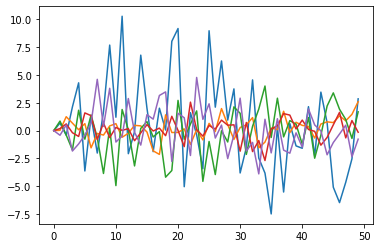

In [7]:
X = utils.simulate_var(W_true, n)
plt.plot(X);

#### NOTEARS Estimation
Now we will estimate using NOTEARS, the $\ell_1$-penalty parameter is $\texttt{lambda1}$. As we have a VAR(1) model, we will use the loss type $\texttt{l2-var}$.

In [8]:
W_est = linear.notears_linear(X, lambda1=0.1, loss_type='l2-var')
print(f"Estimated WAM:\n{np.round(W_est, 1)}.\n")

C:\Users\s165048\OneDrive - TU Eindhoven\QuinceyFinalProject\final-project\src\Week 12\notears\notears\linear.py:65: RuntimeWarning: invalid value encountered in multiply
  G_h = E.T * W * 2
C:\Users\s165048\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\matfuncs.py:709: LinAlgWarning: Ill-conditioned matrix (rcond=8.55924e-20): result may not be accurate.
  return solve(Q, P)
C:\Users\s165048\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\matfuncs.py:709: LinAlgWarning: Ill-conditioned matrix (rcond=1.03437e-26): result may not be accurate.
  return solve(Q, P)
C:\Users\s165048\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\matfuncs.py:709: LinAlgWarning: Ill-conditioned matrix (rcond=1.073e-28): result may not be accurate.
  return solve(Q, P)
C:\Users\s165048\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\matfuncs.py:709: LinAlgWarning: Ill-conditioned matrix (rcon

1.178694484682552e-05 1e+16
[[ 1.51185876e-01 -4.26458793e-02 -4.92433214e-01 -1.00371755e-01
   3.41418322e-01]
 [ 0.00000000e+00  1.70112202e-01  0.00000000e+00  2.50297964e-09
  -3.22528134e-10]
 [-2.01928907e-06  0.00000000e+00  0.00000000e+00  0.00000000e+00
  -4.51078877e-02]
 [ 2.43133472e-08  6.63637472e-05 -2.39103308e-06  0.00000000e+00
   1.43386568e-05]
 [ 0.00000000e+00 -2.83739336e-02 -1.46166068e-05  7.34403202e-02
   0.00000000e+00]]
(2083983.7251423858, array([ 3.56403918e+10, -1.00532926e+10, -1.16085664e+11, -2.36615270e+10,
        8.04855794e+10,  9.03566665e-02,  4.01020631e+10,  1.56476047e-01,
        5.90049594e+02, -7.58304808e+01, -4.76024781e+05,  5.13230710e-02,
        6.71310001e-04,  1.23696010e-01, -1.06336838e+10,  5.73160030e+03,
        1.56445167e+07, -5.63659300e+05,  1.13922674e-01,  3.38017915e+06,
        1.61193446e-01, -6.68883986e+09, -3.44570257e+06,  1.73127402e+10,
        3.12643175e-02, -3.56403918e+10,  1.00532926e+10,  1.16085664e+11,


C:\Users\s165048\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\sparse\linalg\matfuncs.py:709: LinAlgWarning: Ill-conditioned matrix (rcond=1.05371e-21): result may not be accurate.
  return solve(Q, P)


#### Get results


In [9]:
acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

{'fdr': 0.0, 'tpr': 0.8, 'fpr': 0.0, 'shd': 1, 'nnz': 4}


### Version 2: Allow for self-loops

Large value for $\rho_{max}$.

VAR based on a DAG on 5 nodes and 10 edges, 50 samples.

Original Adjacency Matrix:
[[0. 0. 0. 0. 0.]
 [0. 1. 1. 0. 1.]
 [1. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0.]
 [1. 0. 1. 0. 1.]].

Original WAM:
[[ 0.   0.   0.   0.   0. ]
 [ 0.  -0.5 -0.5  0.  -0.5]
 [-0.5  0.   0.   0.   0. ]
 [ 0.5  0.  -0.5 -0.5  0. ]
 [-0.5  0.  -0.5  0.   0.5]].

0.00019505772445072012 1e+50
[[ 4.27833321e-01 -9.52105278e-04 -2.99742039e-02 -2.43240387e-02
   4.12001265e-03]
 [-8.13193405e-06 -6.74915662e-01 -2.93072353e-05 -7.56356788e-06
  -8.53015153e-07]
 [-2.66486780e-03  2.02199712e-02  5.80781448e-02  2.70313940e-02
  -3.09547206e-03]
 [ 7.99171104e-05  2.46918943e-05 -2.00610843e-05 -1.20766498e+00
   5.78194347e-08]
 [-3.82922524e-04  1.57398128e-04 -2.17587889e-05  1.37157660e-06
   1.20502664e+00]]
(5.707127380183958e+42, array([ 1.66904388e+46, -3.71430978e+43, -1.16934000e+45, -9.48918329e+44,
        1.60728058e+44, -3.17239310e+41, -2.63295026e+46, -1.14332053e+42,
       -2.95066468e+41, -3.32774389e+

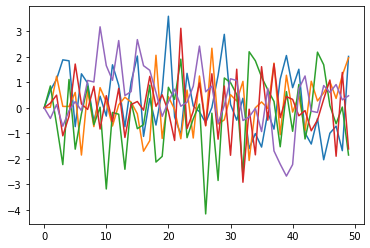

In [10]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 50, 5, 10, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-0.5, -0.5), (0.5, 0.5)))
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")

X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 1e50)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

Even when the coefficients are larger than 1 in absolute value, notears seem to estimate them just fine. Even more, we seem to require much less samples $n$.

VAR based on a DAG on 3 nodes and 4 edges, 20 samples.

Original Adjacency Matrix:
[[0. 0. 1.]
 [0. 1. 1.]
 [0. 0. 1.]].

Original WAM:
[[ 0.  0. -2.]
 [ 0. -2. -2.]
 [ 0.  0. -2.]].

0.0 1.0
[[-4.94844581e-01 -3.01090772e-16 -7.51482458e-18]
 [ 3.58091032e-07 -3.99962529e+00 -9.01106600e-18]
 [-2.60558477e-03 -1.23945653e-03 -4.00002881e+00]]
(1.410503651036337, array([ 1.19937943e-05, -5.28851216e-05,  6.95083966e-07, -3.88076255e-02,
        1.02778430e-01, -1.45369024e-01, -5.14464998e-02,  3.23517201e-01,
       -5.03129400e-01, -1.19937943e-05,  5.28851216e-05, -6.95083966e-07,
        3.88076255e-02, -1.02778430e-01,  1.45369024e-01,  5.14464998e-02,
       -3.23517201e-01,  5.03129400e-01]))
Estimated WAM:
[[ 0.    0.   -2.47]
 [ 0.   -2.   -2.  ]
 [ 0.    0.   -2.  ]].

{'fdr': 0.0, 'tpr': 1.0, 'fpr': 0.0, 'shd': 0, 'nnz': 4}


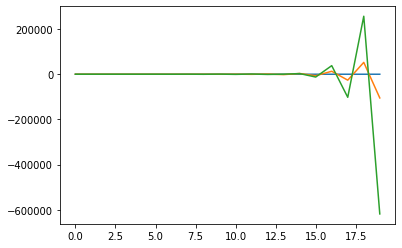

In [11]:
utils.set_random_seed(2)

n, d, s0, graph_type, sem_type = 20, 3, 4, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-2.0, -2.0), (-2.0, -2.0)))
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")

X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 1e12)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

VAR based on a DAG on 4 nodes and 10 edges, 20 samples.

Original Adjacency Matrix:
[[1. 0. 0. 0.]
 [1. 1. 1. 0.]
 [1. 0. 1. 0.]
 [1. 1. 1. 1.]].

Original WAM:
[[ 0.61  0.    0.    0.  ]
 [ 0.77 -0.68  0.58  0.  ]
 [-0.81  0.    0.67  0.  ]
 [-0.71 -0.85  0.62 -0.83]].

7.75094919376329e-05 1e+33
[[ 5.16206932e-01  7.85021710e-04 -1.64518579e-01  7.70590682e-03]
 [ 1.86415746e-06 -7.71228064e-01  2.00745275e-04 -7.82009950e-03]
 [-1.51058823e-04  7.33724423e-03  6.19912862e-01  1.52398320e-02]
 [-1.08686862e-06 -1.63126885e-06  3.28365235e-05 -1.05849341e+00]]
(9.011582010644969e+24, array([ 8.00218740e+28,  1.21693268e+26, -2.55035029e+28,  1.19456185e+27,
        2.88979796e+23, -1.19554991e+29,  3.11193286e+25, -1.21226388e+27,
       -2.34169852e+25,  1.13741215e+27,  9.60982620e+28,  2.36246326e+27,
       -1.68485269e+23, -2.52877639e+23,  5.09028450e+24, -1.64086572e+29,
       -8.00218740e+28, -1.21693268e+26,  2.55035029e+28, -1.19456185e+27,
       -2.88979796e+23,  1.195549

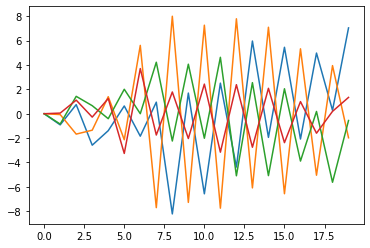

In [12]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 20, 4, 10, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-0.5, -0.9), (0.5, 0.9)))
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")

X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 1e32)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

## Things go wrong
Sometimes, the value $\rho_{max}$ will become too large, and the algorithm will terminate whereas $W$ is not a DAG. We can see that variable $1$ depends on variable $2$ and vice versa, meaning that we most certainly do not have a DAG here.

VAR based on a DAG on 10 nodes and 3 edges, 50 samples.

Original Adjacency Matrix:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]].

Original WAM:
[[0.  0.  0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]].

0.00019748370761618617 10.0
[[-6.27702060e-01 -8.66353602e-03 -1.25550775e-07  3.30480726e-05
   1.39766155e-05  3.20592429e-05  5.01725

ValueError: B_est should be a DAG

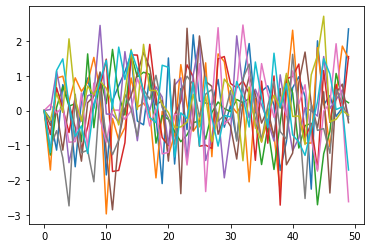

In [13]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 50, 10, 3, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-0.5, -0.5), (0.5, 0.5)))
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")

X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 2)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

does not occur when we double the number of samples to $100$.

VAR based on a DAG on 10 nodes and 3 edges, 100 samples.

Original Adjacency Matrix:
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]].

Original WAM:
[[0.  0.  0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.  0.  0. ]].

9.444915118450581e-06 1e+50
[[-6.43543609e-02 -8.17849977e-04 -3.78899954e-05  1.83045054e-06
  -4.55995994e-05  3.35510202e-06  9.3665

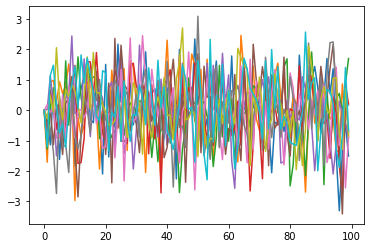

In [14]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 100, 10, 3, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-0.5, -0.5), (0.5, 0.5)))
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")

X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 1e50)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

In [ ]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 100, 8, 36, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-0.5, -2.5), (0.5, 2.5)))

for i, elem in enumerate(np.diag(W_true)):
    if np.abs(elem) > 1:
        W_true[i][i] = np.random.uniform(low = 0.9, high = 0.9)
        
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")
        
X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 1e50)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)

In [ ]:
utils.set_random_seed(1)

n, d, s0, graph_type, sem_type = 5, 5, 3, 'VAR', 'gauss'
print(f"VAR based on a DAG on {d} nodes and {s0} edges, {n} samples.\n")

B_true = utils.simulate_dag(d, s0, graph_type)
print(f"Original Adjacency Matrix:\n{B_true}.\n")

W_true = utils.simulate_parameter(B_true, w_ranges = ((-0.5, -0.5), (0.5, 0.5)))
print(f"Original WAM:\n{np.round(W_true, 2)}.\n")

X = utils.simulate_var(W_true, n)
plt.plot(X);

W_est = linear.notears_linear(X, lambda1=0.0, loss_type='l2-var', h_tol = 1e-18, rho_max = 1e50)
print(f"Estimated WAM:\n{np.round(W_est, 2)}.\n")

acc = utils.count_accuracy(B_true, W_est != 0)
print(acc)